In [2]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_text, _tree
from sklearn.metrics import classification_report

import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
from sklearn import metrics
from joblib import dump, load

In [3]:
# Import the two datasets 

df = pd.read_csv("log_labeled_trans.csv", header = 0).fillna(0)
df.columns = df.columns.str.replace(' ', '_')
df['Label']=df['Label'].str.replace(' ', '_')

In [4]:
data_top = df.columns
columns = list(data_top) 
print(columns)

['Start_time', 'End_time', 'Hall-Bathroom_door', 'ToiletFlush', 'Plates_cupboard', 'Fridge', 'Microwave', 'Groceries_Cupboard', 'Hall-Toilet_door', 'Frontdoor', 'Hall-Bedroom_door', 'Pans_Cupboard', 'Freezer', 'Cups_cupboard', 'Dishwasher', 'Washingmachine', 'Label', 'Label_ID']


In [5]:
features = columns
features.remove("Label")
features.remove("Label_ID")
features.remove("Start_time")
features.remove("End_time")
features

['Hall-Bathroom_door',
 'ToiletFlush',
 'Plates_cupboard',
 'Fridge',
 'Microwave',
 'Groceries_Cupboard',
 'Hall-Toilet_door',
 'Frontdoor',
 'Hall-Bedroom_door',
 'Pans_Cupboard',
 'Freezer',
 'Cups_cupboard',
 'Dishwasher',
 'Washingmachine']

In [6]:
X = df[features]
# y = df.Label_ID
y = df.Label

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8992248062015504


In [8]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

        get_drink       0.00      0.00      0.00         2
        go_to_bed       0.40      0.40      0.40         5
      leave_house       1.00      1.00      1.00        20
prepare_Breakfast       1.00      0.82      0.90        33
       use_toilet       0.91      0.97      0.94        69

         accuracy                           0.90       129
        macro avg       0.66      0.64      0.65       129
     weighted avg       0.91      0.90      0.90       129



In [9]:
print("Trying to predict the take shower activity, with ID 5, \nwith the following combination 1,0,0,0,0,0,0,3,0,0,0,0,0,0")
pred = clf.predict([[1,0,0,0,0,0,0,3,0,0,0,0,0,0]])
print("Value predicted:", pred)
if(pred == 5): print("Correct prediction") 
else: print("Wrong predicition")

Trying to predict the take shower activity, with ID 5, 
with the following combination 1,0,0,0,0,0,0,3,0,0,0,0,0,0
Value predicted: ['leave_house']
Wrong predicition


<AxesSubplot: xlabel='index', ylabel='Label'>

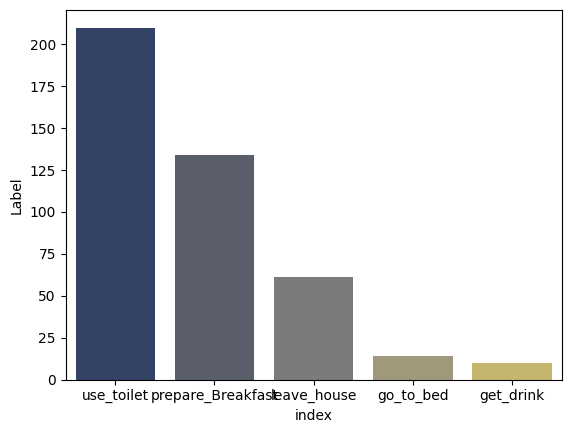

In [10]:
xx = df[["Label"][0]].value_counts().reset_index()
sns.barplot(x="index", y="Label", data= xx, palette="cividis")

               index  Label
0         use_toilet    210
1  prepare_Breakfast    210
2        leave_house    210
3          go_to_bed    210
4          get_drink    210


<AxesSubplot: xlabel='index', ylabel='Label'>

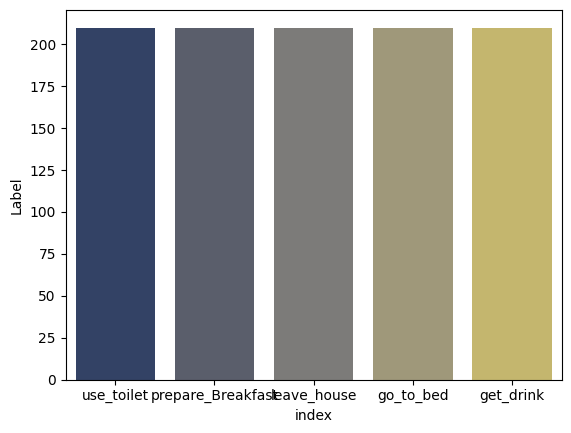

In [11]:
X = df[features]
y = df.Label

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.columns = features + ["Label"]
xx = df[["Label"][0]].value_counts().reset_index()
print(xx)
sns.barplot(x="index", y="Label", data= xx, palette="cividis")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

dump(clf, 'test.joblib') 

data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names = clf.classes_, filled=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree_classifier_test.png')

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523
